In [14]:
from datasets import load_dataset
from PIL import Image
import hashlib
from tqdm import tqdm

In [2]:
dataset = load_dataset("team-hatakeyama-phase2/the_cauldron_subset_with_id", "websight", cache_dir="tmp/cache")

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['images', 'texts', 'id'],
        num_rows: 10000
    })
})

In [4]:
dataset["train"][0]

{'images': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2560x1440>],
 'texts': [{'user': 'Transform this website screenshot into HTML code.',
   'assistant': '<html>\n<link href="https://cdn.jsdelivr.net/npm/tailwindcss@2.2.19/dist/tailwind.min.css" rel="stylesheet">\n<body class="bg-gray-100">\n  <div class="flex flex-col items-center justify-center h-screen">\n    <h1 class="text-4xl font-bold text-center text-gray-800">Fashion Brand</h1>\n    <p class="mt-4 text-lg text-center text-gray-600">\n      Fashion Brand is a leading fashion brand that offers a wide range of high-quality, stylish clothing and accessories. Our collections are designed to reflect the latest fashion trends and are made from high-quality materials. We are committed to providing our customers with the best possible shopping experience and we strive to make our collections accessible to all.\n    </p>\n    <div class="mt-8">\n      <img src="https://source.unsplash.com/random/300x200/?fashion" alt="Fas

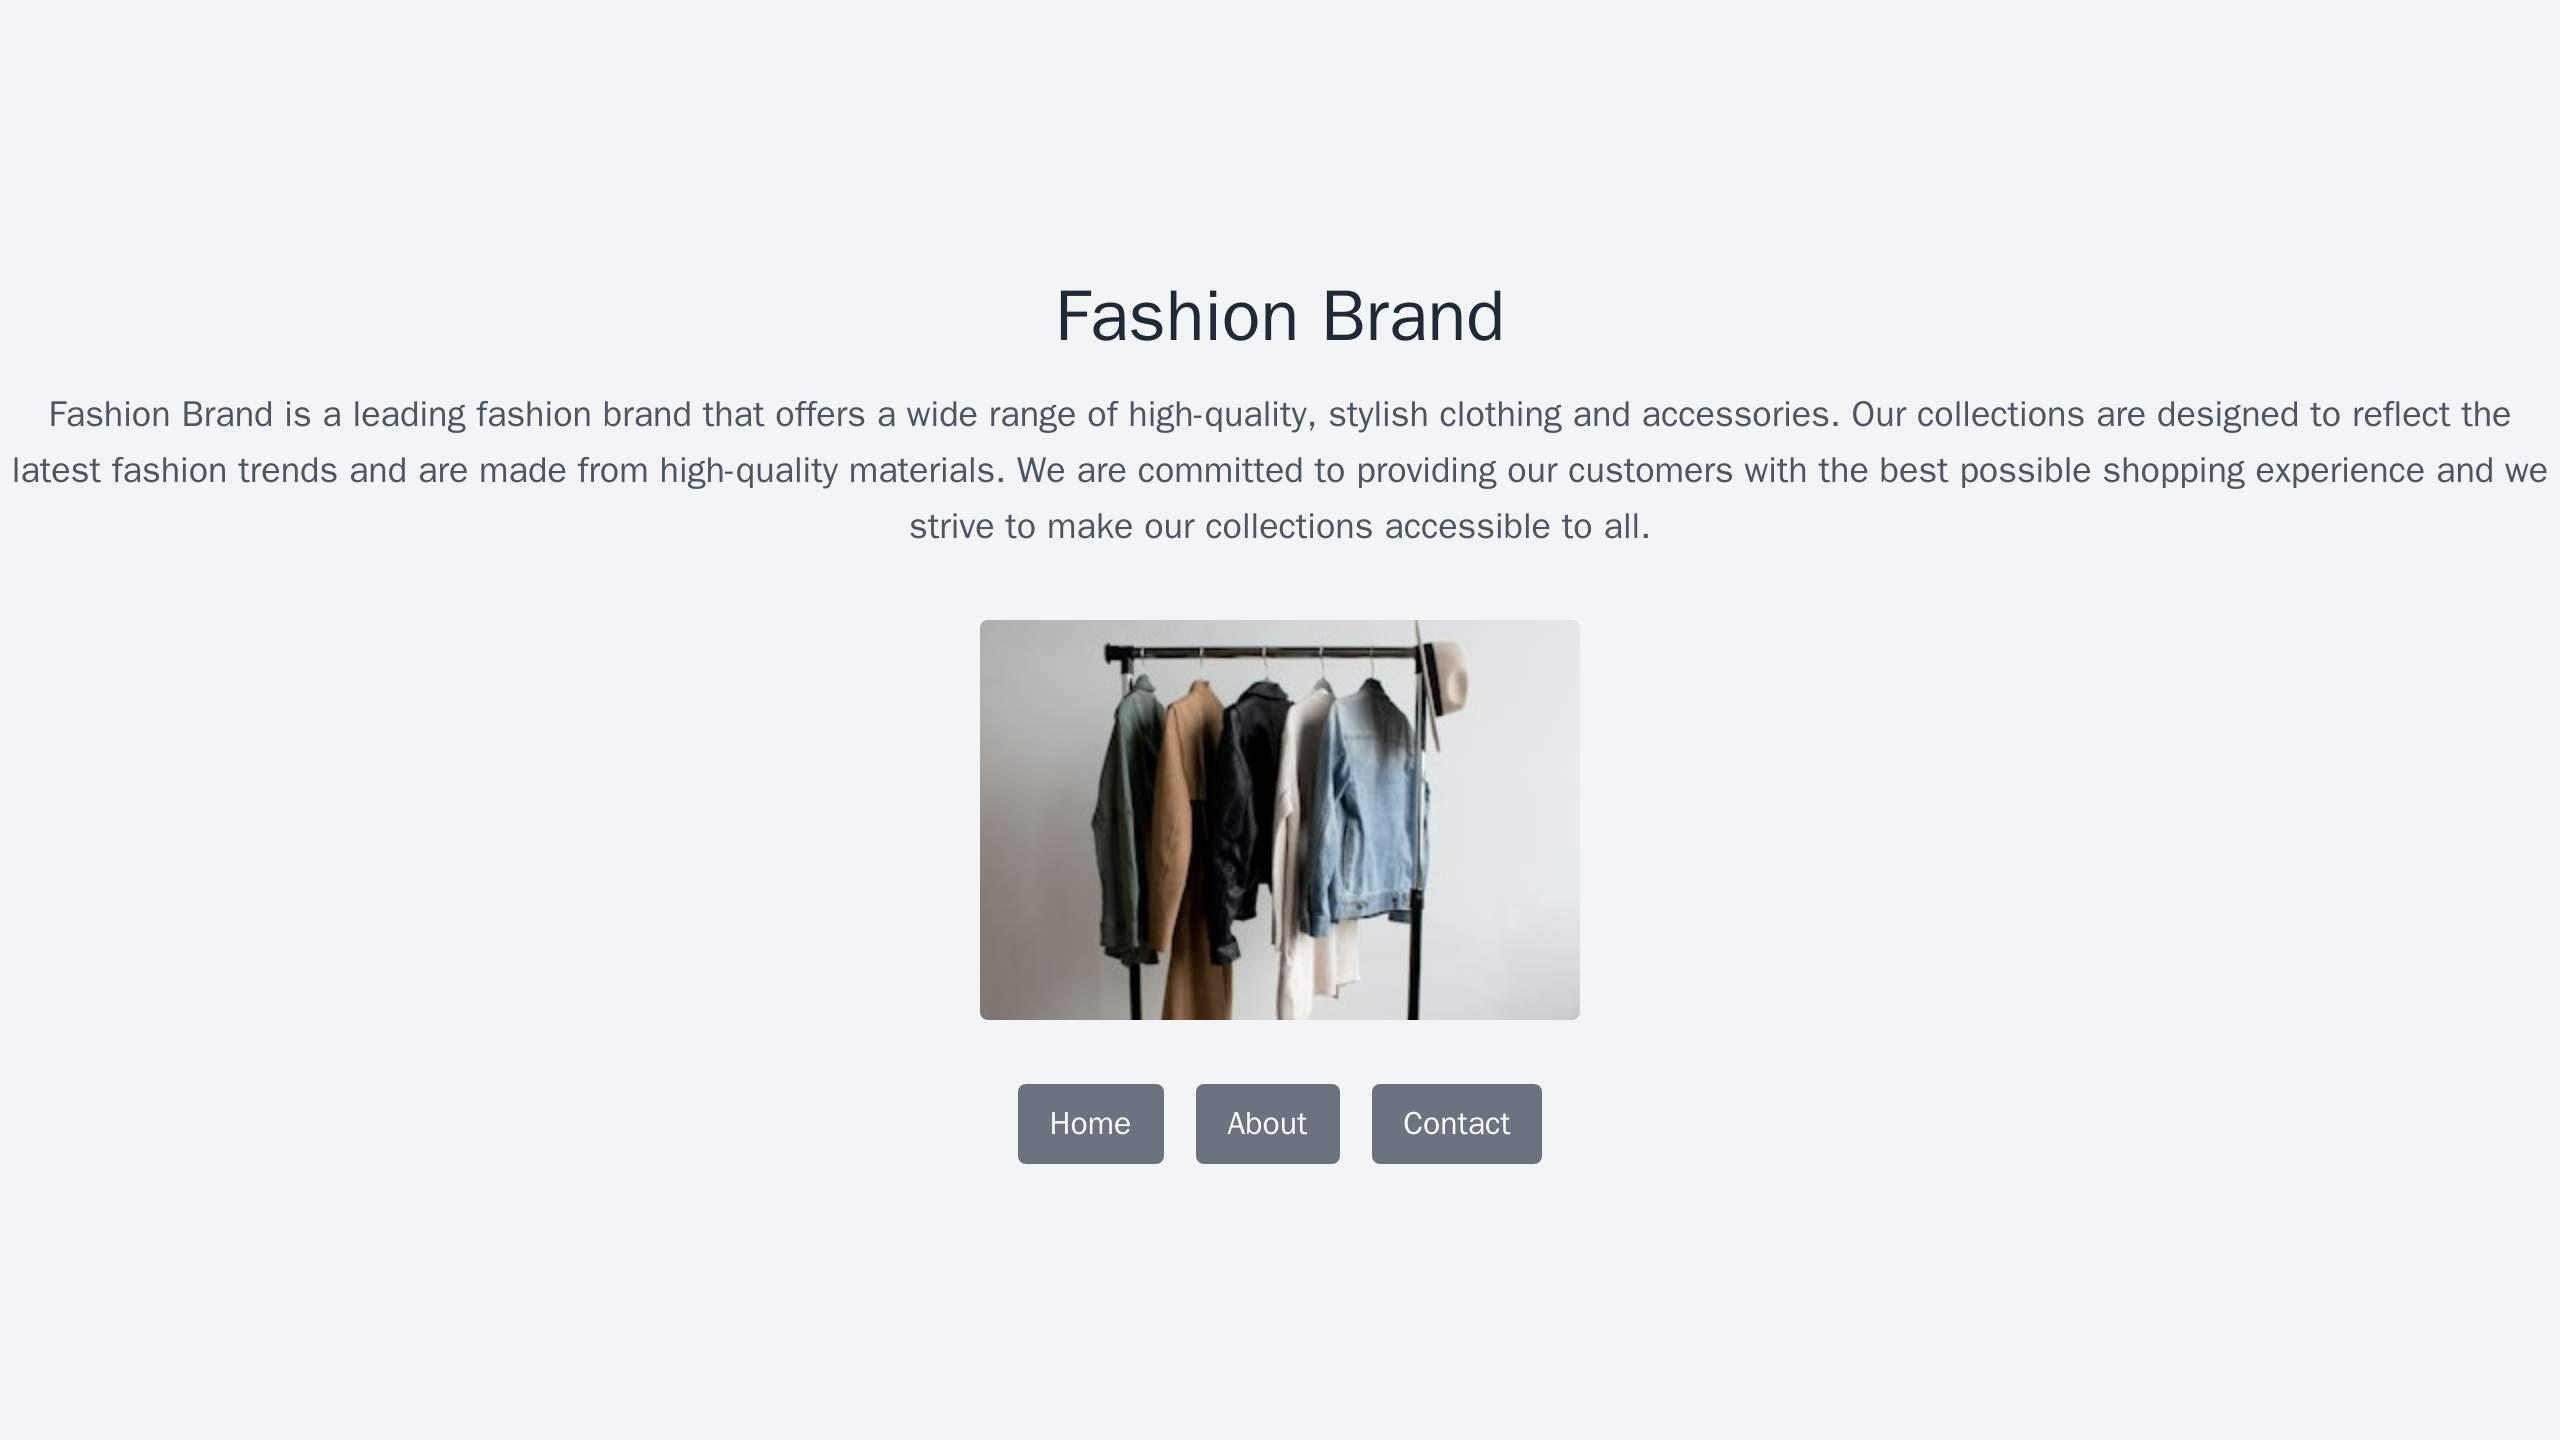

In [5]:
dataset["train"][0]["images"][0].show()

In [6]:
dataset["train"][0]["images"][0].format

'JPEG'

In [7]:
#dataset["train"][0]["images"][0].save("./tmp/test.jpg")

In [8]:
def calculate_image_hash(image):
    # 画像データをバイト列に変換
    image_bytes = image.tobytes()
    
    # SHA-256ハッシュ値を計算
    hash_md5 = hashlib.sha256(image_bytes).hexdigest()
    return hash_md5

In [9]:
#image_hash = calculate_image_hash(dataset["train"][0]["images"][0])
#image_hash

In [15]:
question = []

for data in tqdm(dataset["train"]):
    texts = data["texts"]

    for text in texts:
        if text["user"] not in question:
            question.append(text["user"])

100% 10000/10000 [02:58<00:00, 56.11it/s]


In [16]:
question_unique = list(set(question))

In [17]:
question_unique

['Reconstruct the HTML code from this website image.',
 "Write the HTML that mirrors this website's layout.",
 "Illustrate the HTML coding for this website's visual format.",
 'Render the HTML code that corresponds to this web design.',
 'Compose the HTML code to achieve the same design as this screenshot.',
 'Translate this website image into its HTML code.',
 "Encode this website's visual representation into HTML.",
 "Craft the HTML code that would generate this website's look.",
 "Synthesize the HTML to emulate this website's layout.",
 'Produce the HTML markup to recreate the visual appearance of this website.',
 "Develop the HTML structure to match this website's aesthetics.",
 'Transform this website screenshot into HTML code.',
 'Generate the HTML code corresponding to this website screenshot.',
 "Formulate the HTML to replicate this web page's design.",
 'Convert this screenshot into its equivalent HTML structure.',
 "Assemble the HTML code to mimic this webpage's style.",
 "Ou